In [27]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import pandas as pd
import os

In [26]:
# load the data
# data = [
#     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     [1.0, 0.0, 0.0, 1.0, 0.0, 0.0], 
#     [1.0, 0.0, 0.0, 0.0, 1.0, 0.0], 
#     [0.0, 0.0, 1.0, 1.0, 0.0, 1.0], 
#     [0.0, 0.0, 1.0, 1.0, 0.0, 1.0], 
#     [0.0, 0.0, 1.0, 0.0, 0.0, 1.0], 
#     [0.0, 1.0, 0.0, 0.0, 0.0, 1.0], 
#     [0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
#     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
#     [0.0, 1.0, 0.0, 0.0, 1.0, 1.0],

#     ]
# df = pd.DataFrame(data, columns = ['a1','a2', 'a3','a4', 'a5','a6'])
# df = pd.read_csv('pp_gas_emmision/gt_2015.csv')

filepaths = ['pp_gas_emmision/'+f for f in os.listdir("pp_gas_emmision") if f.endswith('.csv')]
print('Files data import from:')
for path in filepaths:
    print(path)
df = pd.concat(
        map(pd.read_csv, filepaths), ignore_index=True)
    
print(df.head())
print(df.tail())

Files data import from:
pp_gas_emmision/gt_2014.csv
pp_gas_emmision/gt_2015.csv
pp_gas_emmision/gt_2011.csv
pp_gas_emmision/gt_2012.csv
pp_gas_emmision/gt_2013.csv
       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16  11.381   
1  9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51  11.476   
2  9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96  11.555   
3  9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83  11.539   
4  9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56  11.484   

       CO     NOX  
0  1.9157  68.292  
1  2.0596  68.610  
2  2.1621  68.324  
3  2.1214  67.619  
4  2.1549  66.499  
           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
36728  4.8631  1027.0  81.084  4.2825  34.045  1100.0  529.98  168.38  14.290   
36729  4.5173  1027.4  80.813  4.2481  33.904  1100.1  530.47  168.07  14.344   
36730  4.2

In [28]:
def normalize(vec):
    return vec / np.sqrt(vec.dot(vec))

In [17]:
alpha      = 0.20                    # learning rate
iterations = 1000000                 # number of iterations
n_output   = 20                      # number of output neurons/clusters
n_pixels   = len(df.columns)         
n_samples  = len(df)                 # total samples in training data
print(len(df))
colors = []

for i in range(n_output):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

36733


In [18]:
# Create a random number generator to sample the dataset using
rng = np.random.default_rng()
    
# Keep track of our changing prototypes
w_chg_ls = list()

In [19]:
# Initialize weights
# max_value = df.max().max()
# min_value = df.min().min()
# print('weights between '+str(min_value)+' and '+str(max_value))
# W = np.random.uniform(low=min_value, high=max_value, size = (n_output, n_pixels))
# print(W)
# for x in range(n_output):
#     W[x] = normalize(W[x])
# print(W)

W = df.sample(n = n_output, ignore_index=True).to_numpy()
print(W)

[[2.1116e+01 1.0121e+03 8.6218e+01 4.4351e+00 2.5283e+01 1.0893e+03
  5.5016e+02 1.3364e+02 1.2047e+01 2.2207e+00 6.0612e+01]
 [8.2247e+00 1.0091e+03 9.5609e+01 5.0552e+00 3.2978e+01 1.1001e+03
  5.2797e+02 1.6360e+02 1.4081e+01 7.4912e-01 6.5631e+01]
 [2.5621e+01 1.0136e+03 4.9864e+01 4.7321e+00 3.0816e+01 1.1000e+03
  5.4130e+02 1.5185e+02 1.3451e+01 1.5415e+00 5.8713e+01]
 [1.0115e+01 1.0134e+03 9.5139e+01 2.7401e+00 1.9358e+01 1.0475e+03
  5.4347e+02 1.1098e+02 1.0471e+01 8.2514e+00 8.9641e+01]
 [1.4809e+01 1.0188e+03 8.9460e+01 4.2322e+00 2.4527e+01 1.0872e+03
  5.5000e+02 1.3408e+02 1.1991e+01 2.0087e+00 7.2350e+01]
 [2.3077e+01 1.0121e+03 6.2725e+01 3.8639e+00 2.7864e+01 1.0964e+03
  5.5005e+02 1.4258e+02 1.2717e+01 1.7200e+00 5.3889e+01]
 [2.2107e+01 1.0098e+03 8.3208e+01 4.1423e+00 2.2726e+01 1.0748e+03
  5.4981e+02 1.2287e+02 1.1368e+01 3.6552e+00 6.0678e+01]
 [5.0865e+00 1.0216e+03 7.9793e+01 2.6790e+00 2.2095e+01 1.0666e+03
  5.4955e+02 1.2496e+02 1.1372e+01 1.9738e+00 7.63

        0       1       2       3       4       5       6       7       8   \
0  21.1160  1012.1  86.218  4.4351  25.283  1089.3  550.16  133.64  12.047   
1   8.2247  1009.1  95.609  5.0552  32.978  1100.1  527.97  163.60  14.081   
2  25.6210  1013.6  49.864  4.7321  30.816  1100.0  541.30  151.85  13.451   
3  10.1150  1013.4  95.139  2.7401  19.358  1047.5  543.47  110.98  10.471   
4  14.8090  1018.8  89.460  4.2322  24.527  1087.2  550.00  134.08  11.991   

        9       10  
0  2.22070  60.612  
1  0.74912  65.631  
2  1.54150  58.713  
3  8.25140  89.641  
4  2.00870  72.350  


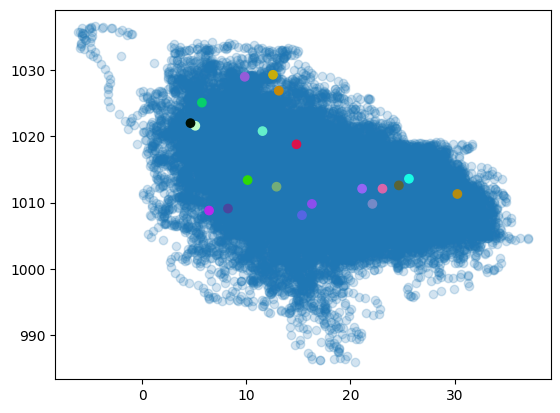

In [20]:
df_w = pd.DataFrame(W)
print(df_w.head())
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', alpha = alpha )
plt.scatter(df_w.loc[:,0], df_w.loc[:,1],  marker = 'o', c = colors)
# plt.scatter(df.iloc[0,0], df.iloc[0,1],  marker = 'o', c = 'g')
# for i in range(df_w.shape[0]):
#     plt.text(df_w.iloc[i,0]+1, df_w.iloc[i,1]+1, s = df_w.index[i], c = colors[i])

In [21]:
def training():          
    for t in range(iterations):
        
        # Keep track of changing weights
        # for visualization
        if t % 1000:
            w_chg_ls.append(np.copy(W))
        
        # Select a random data pattern
        rand_i = rng.integers(n_samples)
        input_vec = np.array(df.loc[rand_i])
        
        # Find the winning neuron
        win_index = np.argmax(np.dot(W,input_vec))
        
        # Apply the delta rule
        W[win_index] += alpha * (input_vec - W[win_index]) 
        
#         W[win_index] = normalize(W[win_index])
        
    return W

In [22]:
weights = training()
weights

array([[  12.33039746, 1014.11691398,   81.26154088,    3.0936554 ,
          21.22709931, 1052.12293592,  541.59288566,  116.50118336,
          10.97064439,    6.6057273 ,   89.49215566],
       [  15.11312318, 1011.38081104,   81.50236726,    3.47057699,
          22.17765276, 1055.34688062,  541.35170115,  118.774709  ,
          11.1741878 ,   10.89067681,   78.75063051],
       [  11.43262355, 1015.06075159,   78.70970696,    3.42197072,
          22.5825142 , 1052.36113784,  538.92666449,  120.63400801,
          11.20930278,    8.20614317,   88.07369498],
       [  10.115     , 1013.4       ,   95.139     ,    2.7401    ,
          19.358     , 1047.5       ,  543.47      ,  110.98      ,
          10.471     ,    8.2514    ,   89.641     ],
       [  15.13591283, 1012.85133081,   76.17919104,    3.20326896,
          20.81826913, 1051.92946371,  544.47850012,  114.73314004,
          10.83981007,    5.03623085,   74.26114353],
       [  13.64773832, 1010.28276666,   83.2747746

In [23]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error

In [24]:

def assign_centroid(data, centroids):
        
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

plotting final graph
execution complete


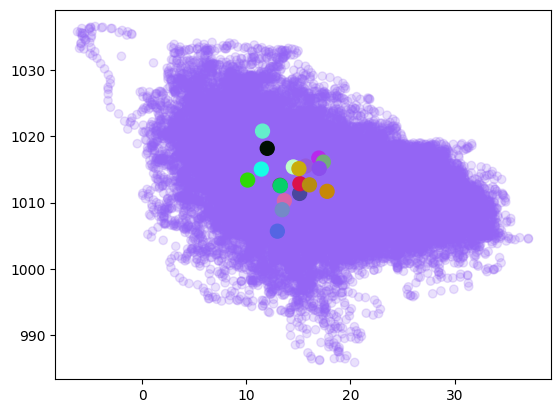

In [25]:
print('plotting final graph')
df_weights = pd.DataFrame(weights)
df['centroid'], df['error'] = assign_centroid(df.iloc[:,:2] ,df_weights)
df[['centroid', 'error']].head()

# colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c = df['centroid'].apply(lambda x: colors[x]), alpha = alpha)
plt.scatter(df_weights.iloc[:,0], df_weights.iloc[:,1],  marker = 'o', s=100, 
           c = df_weights.index.map(lambda x: colors[x]))

print('execution complete')